In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [44]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing


In [45]:
df= pd.read_csv("../../data/processed/oline_merge.csv")

In [46]:
df = df.drop('year',axis=1)
df = df.drop('playername',axis=1)
df = df.drop('team',axis=1)
df = df.drop('basesalarycap (10^8)',axis=1)
df = df.drop('cashspent (M)',axis=1)
df = df.drop('caphit (M)',axis=1)
df = df.drop('Unnamed: 0',axis=1)
#df['catchpercent'] = float(df['catchpercent'].str[:-1])
df = df.drop('catchpercent',axis=1)
df = df.drop('Unnamed: 0.1',axis=1)
df = df.drop('draft_yr',axis=1)

In [47]:
df.columns

Index(['age', 'draft_pos', 'attempts', 'yards_run', 'tds_run', 'longgain_run',
       'yardsperatt', 'yardspergame_run', 'Percenthit (%)', 'g', 'gs', 'tgt',
       'rec', 'yards_rec', 'yardsperrec', 'tds_rec', 'firstdowns',
       'longgain_rec', 'yardspertarget', 'recpergame', 'yardspergame_rec',
       'fumbles', 'team_adjusted_line_yards', 'team_running_back_yards',
       'team_stuffed_rate'],
      dtype='object')

## Splitting & Scaling

In [48]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)


In [49]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,470.0,25.374468,2.913132,21.0,23.000000,25.000000,27.000000,37.000000
draft_pos,470.0,68.329787,68.766653,-1.0,9.000000,55.000000,97.000000,250.000000
attempts,470.0,144.091489,91.154606,2.0,65.250000,131.500000,216.000000,392.000000
yards_run,470.0,623.561702,416.246876,-3.0,284.500000,543.500000,934.750000,1845.000000
tds_run,470.0,4.568085,4.088916,0.0,1.000000,4.000000,7.000000,28.000000
longgain_run,470.0,40.725532,21.015356,3.0,24.000000,38.000000,55.000000,97.000000
yardsperatt,470.0,4.243404,0.860548,-0.3,3.800000,4.200000,4.800000,7.700000
yardspergame_run,470.0,47.543830,25.989095,-0.2,27.025000,45.550000,67.050000,122.400000
Percenthit (%),470.0,1.755724,1.999999,0.0,0.426749,0.829555,2.362975,11.300813
g,470.0,12.982979,3.475121,1.0,11.000000,14.000000,16.000000,16.000000


In [50]:
#'Percenthit (%)'

In [51]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Percenthit (%)')
test_labels = test_features.pop('Percenthit (%)')

In [52]:
train_features

,age,draft_pos,attempts,yards_run,tds_run,longgain_run,yardsperatt,yardspergame_run,g,gs,...,tds_rec,firstdowns,longgain_rec,yardspertarget,recpergame,yardspergame_rec,fumbles,team_adjusted_line_yards,team_running_back_yards,team_stuffed_rate
525,31,24,190,707,6,55,3.7,47.1,15,15,...,0,6,17,5.5,1.3,9.9,0,14.0,21.0,20.0
479,27,105,17,39,0,12,2.3,4.3,9,0,...,1,6,15,4.7,1.0,8.3,0,19.0,20.0,6.0
391,24,-1,123,623,1,83,5.1,47.9,13,5,...,1,6,17,5.5,1.5,9.2,2,8.0,5.0,20.0
165,23,74,79,299,1,18,3.8,42.7,11,11,...,0,6,34,5.3,2.5,18.8,1,15.0,11.0,15.0
503,27,56,33,158,1,25,4.8,31.6,5,1,...,0,4,16,4.9,2.2,18.8,2,24.0,28.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,30,-1,170,934,6,80,5.5,93.4,10,10,...,0,15,49,8.8,3.9,44.2,2,12.0,2.0,14.0
94,29,57,245,1070,6,58,4.4,66.9,16,14,...,0,2,14,2.6,0.6,2.6,4,21.0,12.0,11.0
3,23,7,81,448,4,46,5.5,37.3,12,4,...,0,2,9,1.2,0.8,1.8,0,5.0,13.0,2.0
485,22,71,130,521,5,24,4.0,37.2,14,8,...,0,2,9,3.6,1.0,5.1,1,6.0,3.0,14.0


In [53]:
normalizer = preprocessing.Normalization()

In [56]:
normalizer.adapt(np.array(train_features))

In [57]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[ 31.   24.  190.  707.    6.   55.    3.7  47.1  15.   15.   27.   20.
  148.    7.4   0.    6.   17.    5.5   1.3   9.9   0.   14.   21.   20. ]]

Normalized: [[ 1.93 -0.65  0.5   0.2   0.35  0.68 -0.63 -0.02  0.58  1.37 -0.41 -0.41
  -0.44 -0.17 -0.72 -0.5  -0.75 -0.15 -0.63 -0.6  -1.05 -0.26  0.53  0.41]]


## 1 Attribute Linear model

In [58]:
ypg = np.array(train_features['yardspergame_run'])

ypg_normalizer = preprocessing.Normalization(input_shape=[1,])
ypg_normalizer.adapt(ypg)

In [59]:
ypg_model = tf.keras.Sequential([
    ypg_normalizer,
    layers.Dense(units=1)
])

ypg_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_4 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [61]:
ypg_model.predict(ypg[:10])

array([[-0.02377894],
       [-2.3168488 ],
       [ 0.01908234],
       [-0.259515  ],
       [-0.85421306],
       [-0.49525124],
       [-1.5346334 ],
       [ 3.3461769 ],
       [-0.68276864],
       [-0.4309595 ]], dtype=float32)

In [62]:
ypg_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [63]:
%%time
history = ypg_model.fit(
    train_features['yardspergame_run'], train_labels,
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Wall time: 3.05 s


In [64]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,1.204272,1.245800,95
96,1.209406,1.245970,96
97,1.204193,1.252591,97
98,1.207839,1.258401,98
99,1.208294,1.251015,99


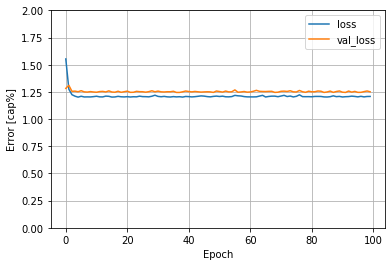

In [74]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 2])
  plt.xlabel('Epoch')
  plt.ylabel('Error [cap%]')
  plt.legend()
  plt.grid(True)
plot_loss(history)

In [69]:
test_results = {}

test_results['ypg_model'] = ypg_model.evaluate(
    test_features['yardspergame_run'],
    test_labels, verbose=0)

In [71]:
x = tf.linspace(0.0, 250, 251)
y = ypg_model.predict(x)

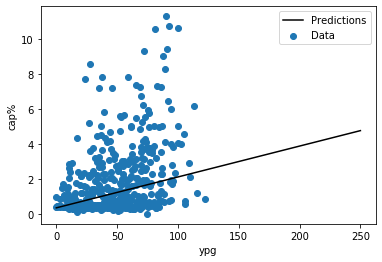

In [75]:
def plot_horsepower(x, y):
  plt.scatter(train_features['yardspergame_run'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('ypg')
  plt.ylabel('cap%')
  plt.legend()
plot_horsepower(x,y)

## Multiple input Linear 

In [76]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [77]:
linear_model.predict(train_features[:10])

array([[ 0.45713383],
       [-2.0384297 ],
       [-0.17470425],
       [-1.8909682 ],
       [-0.6040747 ],
       [-0.00879008],
       [-1.141384  ],
       [ 0.13308364],
       [ 5.4120483 ],
       [ 0.4097252 ]], dtype=float32)

In [78]:
linear_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(24, 1) dtype=float32, numpy=
array([[ 0.42689106],
       [-0.40044117],
       [-0.08917248],
       [ 0.3055571 ],
       [ 0.34202102],
       [ 0.22223452],
       [ 0.2468485 ],
       [-0.1815474 ],
       [ 0.1852453 ],
       [-0.47199705],
       [-0.01084739],
       [ 0.4721398 ],
       [ 0.20844838],
       [ 0.15225855],
       [-0.14669207],
       [ 0.4729366 ],
       [ 0.10447338],
       [-0.35251218],
       [-0.22088194],
       [ 0.47804663],
       [ 0.04007152],
       [-0.28265995],
       [ 0.39880374],
       [ 0.35030207]], dtype=float32)>

In [87]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [88]:
%%time
history = linear_model.fit(
    train_features, train_labels, 
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Wall time: 2.46 s


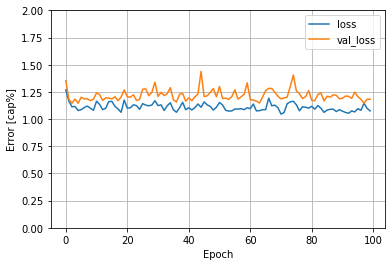

In [89]:
plot_loss(history)

In [90]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

# DNN Model

In [91]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [92]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_3 (Normalizati (None, 24)                49        
_________________________________________________________________
dense_2 (Dense)              (None, 64)                1600      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 5,874
Trainable params: 5,825
Non-trainable params: 49
_________________________________________________________________


In [93]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

Wall time: 2.66 s


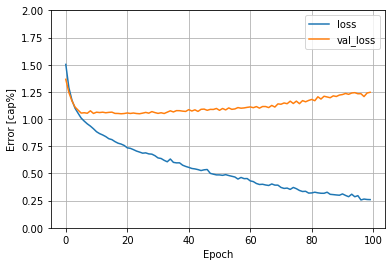

In [94]:
plot_loss(history)

In [95]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [97]:
pd.DataFrame(test_results, index=['Mean absolute error [cap %]']).T

,Mean absolute error [cap %]
ypg_model,1.122454
linear_model,1.123733
dnn_model,0.976482


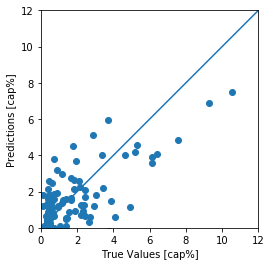

In [100]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [cap%]')
plt.ylabel('Predictions [cap%]')
lims = [0, 12]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

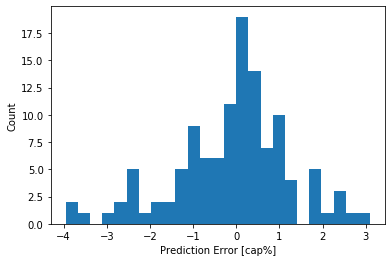

In [102]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [cap%]')
_ = plt.ylabel('Count')

In [103]:
dnn_model.save('dnn_model_1')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: dnn_model_1\assets


In [104]:
reloaded = tf.keras.models.load_model('dnn_model_1')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

In [105]:
pd.DataFrame(test_results, index=['Mean absolute error [cap%]']).T

,Mean absolute error [cap%]
ypg_model,1.122454
linear_model,1.123733
dnn_model,0.976482
reloaded,0.976482


In [106]:
test_predictions

array([ 6.891777  ,  7.5110855 ,  0.12635934,  0.3569242 ,  0.55310476,
        1.1641307 ,  1.1166962 ,  0.06646413,  1.6720322 ,  0.5586854 ,
        0.5762304 ,  1.2904627 ,  0.01620926,  0.3052808 ,  0.10139424,
        0.09674871,  1.298388  ,  0.40137944,  1.5479516 ,  0.49034366,
        2.6229784 ,  0.78456366,  2.166416  ,  1.186406  ,  3.8026643 ,
        0.62701416,  0.58777833,  4.177084  ,  3.9942966 ,  1.2236209 ,
        0.63921607,  0.884815  ,  0.2548357 ,  1.8291907 ,  0.04432723,
        2.7609813 ,  0.5686544 ,  0.6531794 ,  1.6935334 ,  1.0596167 ,
        1.601129  ,  0.88349056,  0.6016245 , -0.37845576,  0.70431125,
        1.5893645 ,  0.8138486 ,  4.0570693 ,  4.031229  ,  1.8203888 ,
        2.5780516 ,  2.4828203 ,  2.9858882 ,  2.20656   ,  0.79216695,
       -0.10106501,  1.2996749 ,  1.2224644 ,  1.8723322 ,  3.6925867 ,
        0.6510681 ,  1.0964429 ,  0.48255405,  3.8894756 ,  1.2664912 ,
        0.00998417,  0.38111705,  1.8199624 ,  0.5331377 ,  0.08

In [107]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

print("EVS: ", explained_variance_score(test_labels,test_predictions))

EVS:  0.5065574474500775
